## Imports

In [18]:
# %load ../custom_tools.py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def corrplot_(
    df=None,
    mask_type="numerical",
    figsize=(14, 14),
    fontsize=8,
    cpalette=(10, 220),
):
    """ Global function that produces customised correlation plot reducing redundancy. """

    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True

    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)

    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()

    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(
        corr_data,
        mask=upper_triangle_mask,
        cmap=cmap,
        vmin=-vmax,
        vmax=vmax,
        square=True,
        linecolor="lightgray",
        linewidths=1,
        ax=ax,
    )

    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(
            iterator + 0.5,
            iterator + 0.5,
            corr_data.columns[iterator],
            ha="center",
            va="center",
            rotation=45,
        )

        for jterator in range(iterator + 1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])

            # Switch-case for numerical whitespace mask
            if mask_type == "numerical":
                ax.text(
                    jterator + 0.5,
                    (iterator + 0.5),
                    value,
                    ha="center",
                    va="center",
                )

            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(
                    jterator + 0.5,
                    (iterator + 0.5),
                    _value_to_category(value),
                    ha="center",
                    va="center",
                    fontsize=fontsize,
                )
    ax.axis("off")


In [19]:
# CUSTOM FUNCTIONS
# import sys
# sys.path.insert(0, "../")
# from custom_tools import corrplot_

# ANALYSIS
import pandas as pd
import numpy as np

# VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
# Allows charts to appear in notebook
%matplotlib inline

# MACHINE LEARNING
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# SECTION 1: Data Analysis

In [20]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Dataframe, target prediction, features

In [23]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df["TARGET_PRICE"] = boston.target

In [24]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Visualistion

In [27]:
def plot_two_features(independent_variable, dependent_variable="TARGET_PRICE"):
    """ Visualizes the scatterplot of data across two features. """
    if dependent_variable == "MEDV":
        plt.scatter(df[independent_variable], df[dependent_variable])
    else:
        plt.scatter(df[independent_variable], df[dependent_variable])
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)

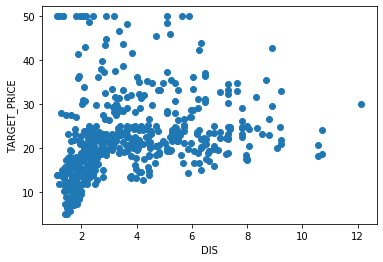

In [29]:
plot_two_features("DIS")

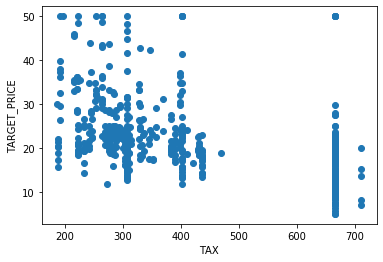

In [30]:
plot_two_features("TAX")

## Correllation heatmap

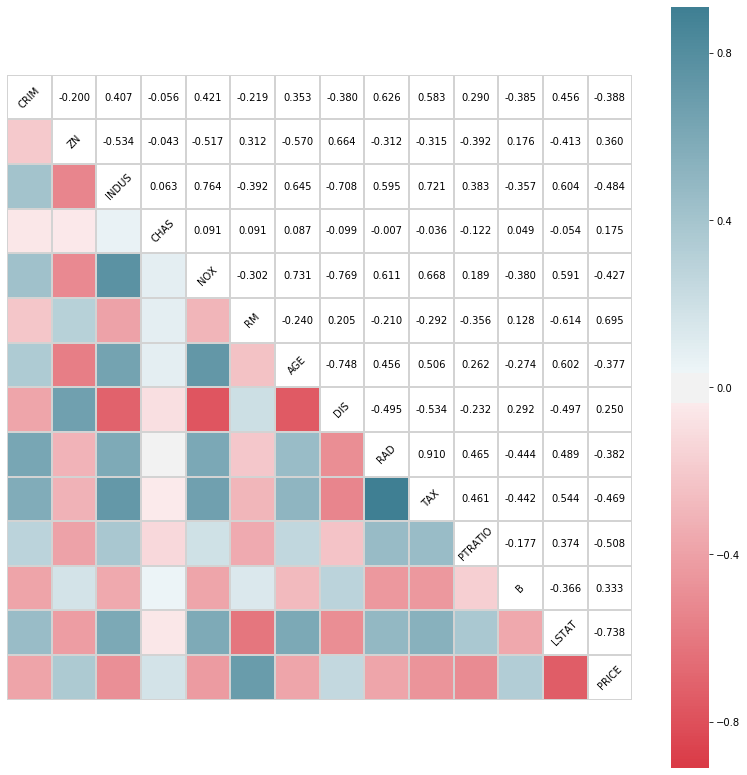

In [99]:
corrplot_(df)

# SECTION 2: Machine Learning

### STEP 1: Instantiating Linear Regression Model

In [36]:
lr_model = LinearRegression()

# split data into test & train
# train model
# predict

### STEP 2: Data split into test & train

In [37]:
X, y = np.array(df["LSTAT"]).reshape(-1, 1), np.array(df["TARGET_PRICE"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### STEP 3: Fit model to training data

In [40]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### STEP 4: Precict data using fitted model against test data (`X_test`)

In [41]:
y_pred = lr_model.predict(X_test)

## Data Normalisation
- To improve prediction results

In [101]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(df)
X_minmax

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])